In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.26.4
!pip install pmdarima --no-cache-dir --force-reinstall

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 41.2 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C


In [ ]:
!pip install pandas numpy matplotlib statsmodels pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


Prepared Series:
Month
2024-01-01    415751.06
2024-02-01    393441.00
2024-03-01    402348.00
2024-04-01    316529.00
2024-05-01    348215.00
2024-06-01    374764.00
2024-07-01    389036.00
2024-08-01         0.00
2024-09-01    404995.00
2024-10-01    685585.00
2024-11-01    268081.00
2024-12-01    603601.00
2025-01-01    470054.00
2025-02-01    553733.00
2025-03-01    490041.00
2025-04-01    365742.00
Freq: MS, Name: Revenue, dtype: float64
                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   16
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 16 Aug 2025   AIC                             10.000
Time:                                    06:37:53   BIC                                nan
Sample:                                01-01-2024   HQIC                               nan
       

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/usr/local/lib/python3.11/dist-packages/statsmodels

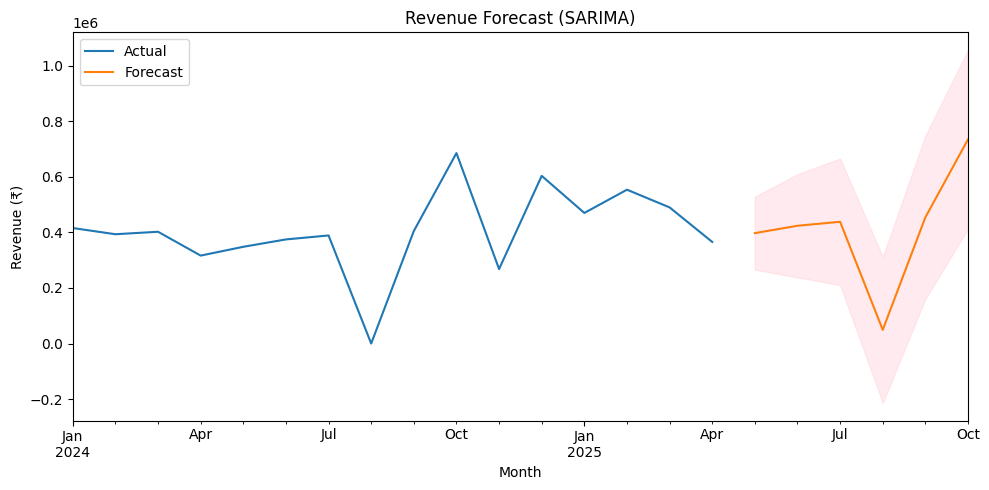

       Month  Forecast_Revenue       Lower_95      Upper_95
0 2025-05-01          397428.0  266035.947433  5.288201e+05
1 2025-06-01          423977.0  238160.577272  6.097934e+05
2 2025-07-01          438249.0  210671.289243  6.658267e+05
3 2025-08-01           49213.0 -213571.105134  3.119971e+05
4 2025-09-01          454208.0  160406.438757  7.480096e+05
5 2025-10-01          734798.0  412954.514954  1.056641e+06


In [ ]:
# Install dependencies (run once per runtime)
!pip install statsmodels matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ------------------------------
# 1) Load and clean data
# ------------------------------
df = pd.read_csv("monthly_sales.csv")

# Drop rows that are not months (like 'Grand Total' or blanks)
df = df[df['Row Labels'].str.contains(r'\d{4}', na=False)]

# Keep only the useful two columns
df = df[['Row Labels', 'Sum of Revenue']]

# Rename them
df.rename(columns={'Row Labels': 'Month', 'Sum of Revenue': 'Revenue'}, inplace=True)

# Convert Month to datetime (format like "Jan-2024")
df['Month'] = pd.to_datetime(df['Month'], format='%b-%Y')

# Sort by date and set index
df = df.sort_values('Month').set_index('Month')

# Make sure it is continuous monthly frequency, fill missing months with 0
y = df['Revenue'].asfreq('MS').fillna(0)

print("Prepared Series:")
print(y)

# ------------------------------
# 2) Seasonal decomposition (to prove seasonality exists)
# ------------------------------
#decomp = seasonal_decompose(y, model='additive', period=12)
#decomp.plot()
#plt.show()

# ------------------------------
# 3) Fit a SARIMA model
# ------------------------------
# A safe starting order for monthly retail data is (1,1,1)x(1,1,1,12)
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())

# ------------------------------
# 4) Forecast next 6 months
# ------------------------------
n_forecast = 6
fc = res.get_forecast(steps=n_forecast)

# Predicted mean and confidence intervals
fc_mean = fc.predicted_mean
fc_ci = fc.conf_int()

# Plot actual + forecast
ax = y.plot(label='Actual', figsize=(10,5))
fc_mean.plot(ax=ax, label='Forecast')
ax.fill_between(fc_ci.index, fc_ci.iloc[:,0], fc_ci.iloc[:,1], color='pink', alpha=0.3)
ax.set_title("Revenue Forecast (SARIMA)")
ax.set_ylabel("Revenue (₹)")
ax.set_xlabel("Month")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 5) Export forecast table
# ------------------------------
out = pd.DataFrame({
    'Month': fc_mean.index,
    'Forecast_Revenue': fc_mean.values,
    'Lower_95': fc_ci.iloc[:,0].values,
    'Upper_95': fc_ci.iloc[:,1].values
})
print(out)

out.to_csv("sarima_forecast_table.csv", index=False)
